In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


- Recency - Months since last donation
- Frequency - Total number of donations
- Monetary - Total blood donated in c.c.
- Time - Months since first donation
- Donated -target variable - donated or not donated

In [3]:
#Assigning columns name
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']
df

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
X = df.drop('Donated', axis = 1)
y= df['Donated']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_split=5,
                             random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.78


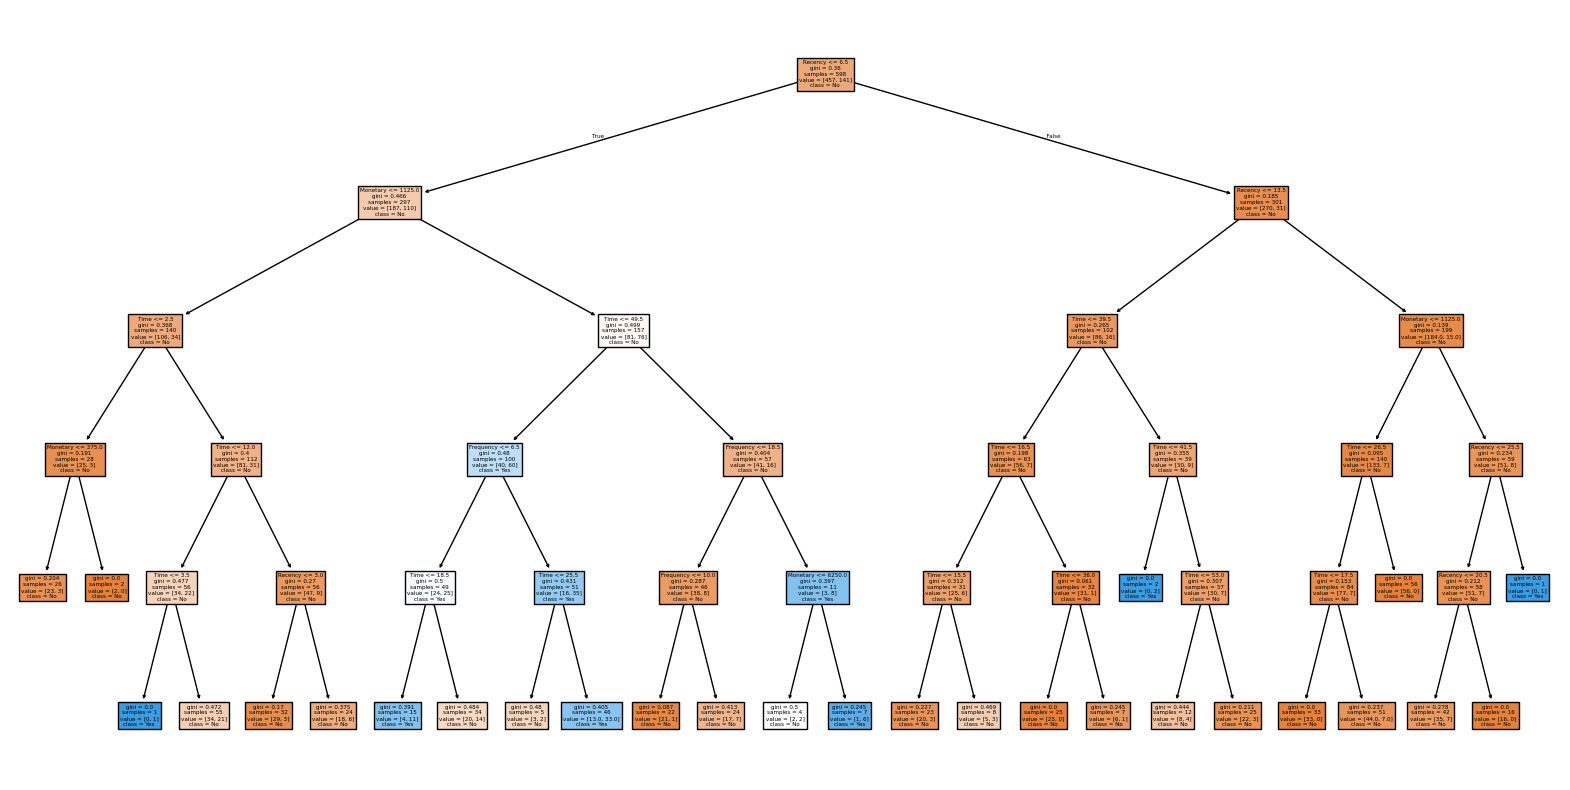

In [9]:
plt.figure(figsize =(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No','Yes'])
plt.show()

In [10]:
print(confusion_matrix(y_test, y_pred))

[[108   5]
 [ 28   9]]


Hyperparameter Tuning

In [11]:
params = [
    {'criterion' : 'gini', 'max_depth': 5, 'min_samples_split': 5},
    {'criterion' : 'gini', 'max_depth': 10, 'min_samples_split': 5},
    {'criterion' : 'entropy', 'max_depth': 5, 'min_samples_split': 5},
    {'criterion' : 'entropy', 'max_depth': 8, 'min_samples_split': 6}
]

In [13]:
for param in params:
    clf = DecisionTreeClassifier(criterion =param['criterion'],
                                 max_depth=param['max_depth'],
                                 min_samples_split=param['min_samples_split'],
                                 random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Params: {param}")
    print(f"Accuracy: {accuracy:.2f}")
    print(confusion_matrix(y_test, y_pred))

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.78
[[108   5]
 [ 28   9]]
Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.66
[[88 25]
 [26 11]]
Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.79
[[104   9]
 [ 23  14]]
Params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6}
Accuracy: 0.71
[[97 16]
 [27 10]]
